In [1]:
# Import Libraries 
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

#Import Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
# Import the Fashion MNIST Dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

In [4]:
# Explore the Data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("The number of training examples: {}".format(num_train_examples))
print("The number of test examples: {}".format(num_test_examples))

The number of training examples: 60000
The number of test examples: 10000


In [5]:
# Preprocess the Data
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each 
# element in the train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded
# from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

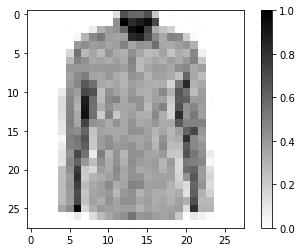

In [6]:
# Explore the processed data
# Take a single image, and remove the color dimension by reshaping 
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape(28, 28)

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

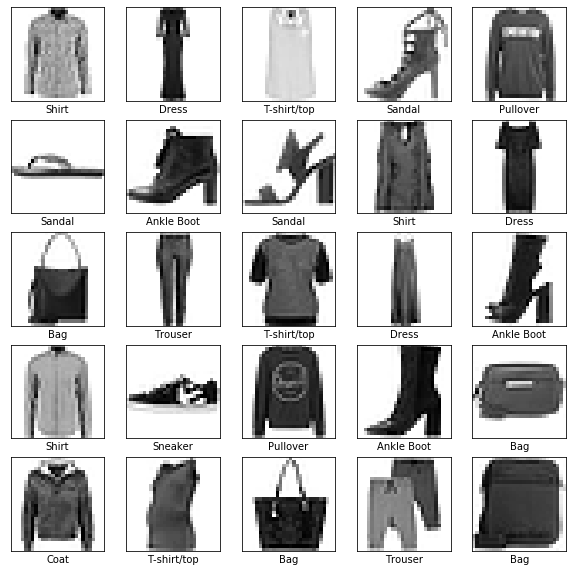

In [7]:
# Display the first 25 images from the training set and their 
# class name
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape(28, 28)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [8]:
# Build The model
# Setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [9]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [10]:
# Traing the Model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=3, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/3


 326/1875 [====>.........................] - ETA: 14:03:58 - loss: 2.3027 - accuracy: 0.12 - ETA: 7:03:51 - loss: 2.2664 - accuracy: 0.1875 - ETA: 4:43:31 - loss: 2.2435 - accuracy: 0.187 - ETA: 2:50:21 - loss: 2.1590 - accuracy: 0.293 - ETA: 2:01:51 - loss: 2.0885 - accuracy: 0.312 - ETA: 1:34:54 - loss: 2.0005 - accuracy: 0.333 - ETA: 1:17:45 - loss: 1.8921 - accuracy: 0.355 - ETA: 1:05:53 - loss: 1.8177 - accuracy: 0.365 - ETA: 57:11 - loss: 1.7563 - accuracy: 0.3812  - ETA: 50:33 - loss: 1.6925 - accuracy: 0.391 - ETA: 45:17 - loss: 1.6275 - accuracy: 0.411 - ETA: 41:01 - loss: 1.6158 - accuracy: 0.413 - ETA: 37:30 - loss: 1.5838 - accuracy: 0.425 - ETA: 34:33 - loss: 1.5578 - accuracy: 0.438 - ETA: 32:02 - loss: 1.5143 - accuracy: 0.445 - ETA: 29:52 - loss: 1.4785 - accuracy: 0.453 - ETA: 27:58 - loss: 1.4390 - accuracy: 0.467 - ETA: 26:18 - loss: 1.4192 - accuracy: 0.476 - ETA: 24:50 - loss: 1.3799 - accuracy: 0.493 - ETA: 23:31 - loss: 1.3437 - accuracy: 0.510 - ETA: 22:20 - los

 689/1875 [==========>...................] - ETA: 3:07 - loss: 0.6376 - accuracy: 0.76 - ETA: 3:06 - loss: 0.6362 - accuracy: 0.76 - ETA: 3:05 - loss: 0.6362 - accuracy: 0.76 - ETA: 3:04 - loss: 0.6353 - accuracy: 0.76 - ETA: 3:03 - loss: 0.6345 - accuracy: 0.76 - ETA: 3:02 - loss: 0.6336 - accuracy: 0.76 - ETA: 3:01 - loss: 0.6335 - accuracy: 0.76 - ETA: 3:00 - loss: 0.6311 - accuracy: 0.76 - ETA: 2:59 - loss: 0.6302 - accuracy: 0.76 - ETA: 2:58 - loss: 0.6294 - accuracy: 0.76 - ETA: 2:57 - loss: 0.6287 - accuracy: 0.76 - ETA: 2:56 - loss: 0.6273 - accuracy: 0.76 - ETA: 2:55 - loss: 0.6258 - accuracy: 0.76 - ETA: 2:55 - loss: 0.6242 - accuracy: 0.76 - ETA: 2:54 - loss: 0.6219 - accuracy: 0.77 - ETA: 2:53 - loss: 0.6208 - accuracy: 0.77 - ETA: 2:52 - loss: 0.6190 - accuracy: 0.77 - ETA: 2:51 - loss: 0.6173 - accuracy: 0.77 - ETA: 2:50 - loss: 0.6157 - accuracy: 0.77 - ETA: 2:49 - loss: 0.6153 - accuracy: 0.77 - ETA: 2:48 - loss: 0.6137 - accuracy: 0.77 - ETA: 2:47 - loss: 0.6122 - accu

1051/1875 [===============>..............] - ETA: 1:30 - loss: 0.5152 - accuracy: 0.81 - ETA: 1:30 - loss: 0.5149 - accuracy: 0.81 - ETA: 1:30 - loss: 0.5146 - accuracy: 0.81 - ETA: 1:29 - loss: 0.5141 - accuracy: 0.81 - ETA: 1:29 - loss: 0.5138 - accuracy: 0.81 - ETA: 1:29 - loss: 0.5133 - accuracy: 0.81 - ETA: 1:28 - loss: 0.5129 - accuracy: 0.81 - ETA: 1:28 - loss: 0.5125 - accuracy: 0.81 - ETA: 1:28 - loss: 0.5123 - accuracy: 0.81 - ETA: 1:28 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:27 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:27 - loss: 0.5120 - accuracy: 0.81 - ETA: 1:27 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:26 - loss: 0.5115 - accuracy: 0.81 - ETA: 1:26 - loss: 0.5110 - accuracy: 0.81 - ETA: 1:26 - loss: 0.5109 - accuracy: 0.81 - ETA: 1:26 - loss: 0.5100 - accuracy: 0.81 - ETA: 1:25 - loss: 0.5096 - accuracy: 0.81 - ETA: 1:25 - loss: 0.5090 - accuracy: 0.81 - ETA: 1:25 - loss: 0.5083 - accuracy: 0.81 - ETA: 1:24 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:24 - loss: 0.5075 - accu

1409/1875 [=====================>........] - ETA: 51s - loss: 0.4598 - accuracy: 0.833 - ETA: 51s - loss: 0.4596 - accuracy: 0.833 - ETA: 51s - loss: 0.4594 - accuracy: 0.833 - ETA: 50s - loss: 0.4595 - accuracy: 0.833 - ETA: 50s - loss: 0.4594 - accuracy: 0.833 - ETA: 50s - loss: 0.4591 - accuracy: 0.833 - ETA: 50s - loss: 0.4588 - accuracy: 0.833 - ETA: 50s - loss: 0.4587 - accuracy: 0.833 - ETA: 50s - loss: 0.4586 - accuracy: 0.833 - ETA: 49s - loss: 0.4584 - accuracy: 0.833 - ETA: 49s - loss: 0.4581 - accuracy: 0.833 - ETA: 49s - loss: 0.4577 - accuracy: 0.833 - ETA: 49s - loss: 0.4574 - accuracy: 0.833 - ETA: 49s - loss: 0.4572 - accuracy: 0.834 - ETA: 49s - loss: 0.4570 - accuracy: 0.834 - ETA: 48s - loss: 0.4567 - accuracy: 0.834 - ETA: 48s - loss: 0.4565 - accuracy: 0.834 - ETA: 48s - loss: 0.4561 - accuracy: 0.834 - ETA: 48s - loss: 0.4560 - accuracy: 0.834 - ETA: 48s - loss: 0.4557 - accuracy: 0.834 - ETA: 48s - loss: 0.4554 - accuracy: 0.834 - ETA: 47s - loss: 0.4552 - accur

1776/1875 [===========================>..] - ETA: 25s - loss: 0.4238 - accuracy: 0.847 - ETA: 25s - loss: 0.4235 - accuracy: 0.847 - ETA: 25s - loss: 0.4233 - accuracy: 0.847 - ETA: 25s - loss: 0.4231 - accuracy: 0.847 - ETA: 25s - loss: 0.4231 - accuracy: 0.847 - ETA: 25s - loss: 0.4228 - accuracy: 0.847 - ETA: 25s - loss: 0.4225 - accuracy: 0.847 - ETA: 24s - loss: 0.4225 - accuracy: 0.847 - ETA: 24s - loss: 0.4223 - accuracy: 0.847 - ETA: 24s - loss: 0.4221 - accuracy: 0.847 - ETA: 24s - loss: 0.4219 - accuracy: 0.847 - ETA: 24s - loss: 0.4218 - accuracy: 0.847 - ETA: 24s - loss: 0.4216 - accuracy: 0.847 - ETA: 24s - loss: 0.4214 - accuracy: 0.847 - ETA: 24s - loss: 0.4213 - accuracy: 0.847 - ETA: 23s - loss: 0.4212 - accuracy: 0.847 - ETA: 23s - loss: 0.4211 - accuracy: 0.848 - ETA: 23s - loss: 0.4211 - accuracy: 0.848 - ETA: 23s - loss: 0.4208 - accuracy: 0.848 - ETA: 23s - loss: 0.4207 - accuracy: 0.848 - ETA: 23s - loss: 0.4206 - accuracy: 0.848 - ETA: 23s - loss: 0.4205 - accur

1875/1875 [==============================] - ETA: 4s - loss: 0.4004 - accuracy: 0.85 - ETA: 4s - loss: 0.4003 - accuracy: 0.85 - ETA: 4s - loss: 0.4002 - accuracy: 0.85 - ETA: 4s - loss: 0.4000 - accuracy: 0.85 - ETA: 4s - loss: 0.3996 - accuracy: 0.85 - ETA: 4s - loss: 0.3994 - accuracy: 0.85 - ETA: 4s - loss: 0.3994 - accuracy: 0.85 - ETA: 4s - loss: 0.3991 - accuracy: 0.85 - ETA: 4s - loss: 0.3989 - accuracy: 0.85 - ETA: 4s - loss: 0.3989 - accuracy: 0.85 - ETA: 3s - loss: 0.3989 - accuracy: 0.85 - ETA: 3s - loss: 0.3987 - accuracy: 0.85 - ETA: 3s - loss: 0.3988 - accuracy: 0.85 - ETA: 3s - loss: 0.3986 - accuracy: 0.85 - ETA: 3s - loss: 0.3986 - accuracy: 0.85 - ETA: 3s - loss: 0.3984 - accuracy: 0.85 - ETA: 3s - loss: 0.3982 - accuracy: 0.85 - ETA: 3s - loss: 0.3981 - accuracy: 0.85 - ETA: 3s - loss: 0.3979 - accuracy: 0.85 - ETA: 2s - loss: 0.3977 - accuracy: 0.85 - ETA: 2s - loss: 0.3976 - accuracy: 0.85 - ETA: 2s - loss: 0.3976 - accuracy: 0.85 - ETA: 2s - loss: 0.3974 - accura

 361/1875 [====>.........................] - ETA: 1:17 - loss: 0.6714 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4008 - accuracy: 0.82 - ETA: 1:06 - loss: 0.4561 - accuracy: 0.81 - ETA: 1:04 - loss: 0.4315 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3713 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3448 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3274 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3378 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3238 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3094 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3021 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3024 - accuracy: 0.88 - ETA: 1:01 - loss: 0.2957 - accuracy: 0.89 - ETA: 1:02 - loss: 0.3000 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2920 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2956 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2920 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2903 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2910 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2916 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2951 - accuracy: 0.88 - ETA: 1:05 - loss: 0.2914 - accu

 722/1875 [==========>...................] - ETA: 54s - loss: 0.2791 - accuracy: 0.897 - ETA: 54s - loss: 0.2788 - accuracy: 0.897 - ETA: 54s - loss: 0.2785 - accuracy: 0.897 - ETA: 54s - loss: 0.2785 - accuracy: 0.897 - ETA: 54s - loss: 0.2787 - accuracy: 0.897 - ETA: 53s - loss: 0.2786 - accuracy: 0.897 - ETA: 53s - loss: 0.2784 - accuracy: 0.897 - ETA: 53s - loss: 0.2785 - accuracy: 0.897 - ETA: 53s - loss: 0.2783 - accuracy: 0.897 - ETA: 53s - loss: 0.2784 - accuracy: 0.897 - ETA: 53s - loss: 0.2779 - accuracy: 0.897 - ETA: 53s - loss: 0.2776 - accuracy: 0.897 - ETA: 53s - loss: 0.2773 - accuracy: 0.897 - ETA: 53s - loss: 0.2779 - accuracy: 0.897 - ETA: 52s - loss: 0.2775 - accuracy: 0.897 - ETA: 52s - loss: 0.2775 - accuracy: 0.897 - ETA: 52s - loss: 0.2785 - accuracy: 0.896 - ETA: 52s - loss: 0.2788 - accuracy: 0.896 - ETA: 52s - loss: 0.2781 - accuracy: 0.897 - ETA: 52s - loss: 0.2781 - accuracy: 0.896 - ETA: 52s - loss: 0.2781 - accuracy: 0.897 - ETA: 52s - loss: 0.2779 - accur

1091/1875 [================>.............] - ETA: 40s - loss: 0.2690 - accuracy: 0.901 - ETA: 40s - loss: 0.2692 - accuracy: 0.901 - ETA: 40s - loss: 0.2689 - accuracy: 0.901 - ETA: 40s - loss: 0.2688 - accuracy: 0.901 - ETA: 40s - loss: 0.2689 - accuracy: 0.901 - ETA: 39s - loss: 0.2687 - accuracy: 0.901 - ETA: 39s - loss: 0.2688 - accuracy: 0.901 - ETA: 39s - loss: 0.2687 - accuracy: 0.901 - ETA: 39s - loss: 0.2688 - accuracy: 0.901 - ETA: 39s - loss: 0.2688 - accuracy: 0.901 - ETA: 39s - loss: 0.2688 - accuracy: 0.901 - ETA: 39s - loss: 0.2687 - accuracy: 0.901 - ETA: 39s - loss: 0.2691 - accuracy: 0.901 - ETA: 39s - loss: 0.2692 - accuracy: 0.901 - ETA: 39s - loss: 0.2690 - accuracy: 0.901 - ETA: 39s - loss: 0.2689 - accuracy: 0.901 - ETA: 39s - loss: 0.2689 - accuracy: 0.901 - ETA: 38s - loss: 0.2689 - accuracy: 0.901 - ETA: 38s - loss: 0.2691 - accuracy: 0.901 - ETA: 38s - loss: 0.2693 - accuracy: 0.901 - ETA: 38s - loss: 0.2698 - accuracy: 0.901 - ETA: 38s - loss: 0.2699 - accur

1455/1875 [======================>.......] - ETA: 26s - loss: 0.2672 - accuracy: 0.902 - ETA: 26s - loss: 0.2671 - accuracy: 0.902 - ETA: 26s - loss: 0.2671 - accuracy: 0.902 - ETA: 26s - loss: 0.2671 - accuracy: 0.902 - ETA: 26s - loss: 0.2670 - accuracy: 0.902 - ETA: 26s - loss: 0.2668 - accuracy: 0.902 - ETA: 26s - loss: 0.2666 - accuracy: 0.902 - ETA: 26s - loss: 0.2667 - accuracy: 0.902 - ETA: 26s - loss: 0.2668 - accuracy: 0.902 - ETA: 25s - loss: 0.2668 - accuracy: 0.902 - ETA: 25s - loss: 0.2666 - accuracy: 0.902 - ETA: 25s - loss: 0.2664 - accuracy: 0.902 - ETA: 25s - loss: 0.2664 - accuracy: 0.902 - ETA: 25s - loss: 0.2663 - accuracy: 0.902 - ETA: 25s - loss: 0.2662 - accuracy: 0.902 - ETA: 25s - loss: 0.2662 - accuracy: 0.902 - ETA: 25s - loss: 0.2662 - accuracy: 0.902 - ETA: 25s - loss: 0.2661 - accuracy: 0.902 - ETA: 25s - loss: 0.2661 - accuracy: 0.902 - ETA: 25s - loss: 0.2660 - accuracy: 0.903 - ETA: 25s - loss: 0.2659 - accuracy: 0.903 - ETA: 25s - loss: 0.2657 - accur

1825/1875 [============================>.] - ETA: 14s - loss: 0.2615 - accuracy: 0.905 - ETA: 14s - loss: 0.2612 - accuracy: 0.905 - ETA: 14s - loss: 0.2611 - accuracy: 0.905 - ETA: 13s - loss: 0.2610 - accuracy: 0.905 - ETA: 13s - loss: 0.2612 - accuracy: 0.905 - ETA: 13s - loss: 0.2613 - accuracy: 0.905 - ETA: 13s - loss: 0.2612 - accuracy: 0.905 - ETA: 13s - loss: 0.2614 - accuracy: 0.905 - ETA: 13s - loss: 0.2615 - accuracy: 0.905 - ETA: 13s - loss: 0.2614 - accuracy: 0.905 - ETA: 13s - loss: 0.2615 - accuracy: 0.905 - ETA: 13s - loss: 0.2614 - accuracy: 0.905 - ETA: 13s - loss: 0.2614 - accuracy: 0.905 - ETA: 13s - loss: 0.2613 - accuracy: 0.905 - ETA: 13s - loss: 0.2611 - accuracy: 0.905 - ETA: 13s - loss: 0.2610 - accuracy: 0.905 - ETA: 13s - loss: 0.2609 - accuracy: 0.905 - ETA: 13s - loss: 0.2609 - accuracy: 0.905 - ETA: 12s - loss: 0.2609 - accuracy: 0.905 - ETA: 12s - loss: 0.2609 - accuracy: 0.905 - ETA: 12s - loss: 0.2609 - accuracy: 0.905 - ETA: 12s - loss: 0.2609 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.2570 - accuracy: 0.90 - ETA: 1s - loss: 0.2571 - accuracy: 0.90 - ETA: 1s - loss: 0.2569 - accuracy: 0.90 - ETA: 1s - loss: 0.2569 - accuracy: 0.90 - ETA: 1s - loss: 0.2568 - accuracy: 0.90 - ETA: 1s - loss: 0.2568 - accuracy: 0.90 - ETA: 1s - loss: 0.2567 - accuracy: 0.90 - ETA: 1s - loss: 0.2567 - accuracy: 0.90 - ETA: 1s - loss: 0.2566 - accuracy: 0.90 - ETA: 1s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2564 - accuracy: 0.90 - ETA: 0s - loss: 0.2563 - accuracy: 0.90 - ETA: 0s - loss: 0.2564 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2566 - accuracy: 0.90 - ETA: 0s - loss: 0.2565 - accuracy: 0.90 - ETA: 0s - loss: 0.2563 - accuracy: 0.90 - ETA: 0s - loss: 0.2563 - accura

 371/1875 [====>.........................] - ETA: 1:26 - loss: 0.0947 - accuracy: 1.00 - ETA: 1:10 - loss: 0.2304 - accuracy: 0.94 - ETA: 1:07 - loss: 0.2792 - accuracy: 0.93 - ETA: 1:06 - loss: 0.2708 - accuracy: 0.93 - ETA: 1:05 - loss: 0.2742 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2653 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2687 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2656 - accuracy: 0.92 - ETA: 1:03 - loss: 0.2534 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2672 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2541 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2588 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2592 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2686 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2639 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2682 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2622 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2714 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2682 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2617 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2575 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2498 - accu

 743/1875 [==========>...................] - ETA: 51s - loss: 0.2274 - accuracy: 0.916 - ETA: 51s - loss: 0.2266 - accuracy: 0.916 - ETA: 51s - loss: 0.2263 - accuracy: 0.916 - ETA: 51s - loss: 0.2263 - accuracy: 0.916 - ETA: 51s - loss: 0.2272 - accuracy: 0.916 - ETA: 51s - loss: 0.2274 - accuracy: 0.916 - ETA: 51s - loss: 0.2270 - accuracy: 0.916 - ETA: 51s - loss: 0.2267 - accuracy: 0.917 - ETA: 51s - loss: 0.2270 - accuracy: 0.916 - ETA: 51s - loss: 0.2270 - accuracy: 0.916 - ETA: 51s - loss: 0.2268 - accuracy: 0.916 - ETA: 51s - loss: 0.2265 - accuracy: 0.916 - ETA: 51s - loss: 0.2260 - accuracy: 0.917 - ETA: 50s - loss: 0.2257 - accuracy: 0.917 - ETA: 50s - loss: 0.2256 - accuracy: 0.917 - ETA: 50s - loss: 0.2255 - accuracy: 0.917 - ETA: 50s - loss: 0.2253 - accuracy: 0.917 - ETA: 50s - loss: 0.2247 - accuracy: 0.917 - ETA: 50s - loss: 0.2247 - accuracy: 0.917 - ETA: 50s - loss: 0.2248 - accuracy: 0.917 - ETA: 50s - loss: 0.2244 - accuracy: 0.917 - ETA: 50s - loss: 0.2242 - accur

1109/1875 [================>.............] - ETA: 37s - loss: 0.2226 - accuracy: 0.918 - ETA: 37s - loss: 0.2225 - accuracy: 0.918 - ETA: 37s - loss: 0.2221 - accuracy: 0.918 - ETA: 37s - loss: 0.2222 - accuracy: 0.918 - ETA: 37s - loss: 0.2221 - accuracy: 0.918 - ETA: 37s - loss: 0.2221 - accuracy: 0.918 - ETA: 37s - loss: 0.2217 - accuracy: 0.918 - ETA: 37s - loss: 0.2216 - accuracy: 0.918 - ETA: 37s - loss: 0.2217 - accuracy: 0.918 - ETA: 37s - loss: 0.2215 - accuracy: 0.918 - ETA: 37s - loss: 0.2215 - accuracy: 0.918 - ETA: 37s - loss: 0.2214 - accuracy: 0.918 - ETA: 37s - loss: 0.2212 - accuracy: 0.918 - ETA: 36s - loss: 0.2211 - accuracy: 0.918 - ETA: 36s - loss: 0.2212 - accuracy: 0.918 - ETA: 36s - loss: 0.2210 - accuracy: 0.918 - ETA: 36s - loss: 0.2212 - accuracy: 0.918 - ETA: 36s - loss: 0.2214 - accuracy: 0.918 - ETA: 36s - loss: 0.2214 - accuracy: 0.918 - ETA: 36s - loss: 0.2213 - accuracy: 0.918 - ETA: 36s - loss: 0.2211 - accuracy: 0.918 - ETA: 36s - loss: 0.2210 - accur

1461/1875 [======================>.......] - ETA: 25s - loss: 0.2186 - accuracy: 0.920 - ETA: 25s - loss: 0.2185 - accuracy: 0.920 - ETA: 25s - loss: 0.2188 - accuracy: 0.919 - ETA: 25s - loss: 0.2190 - accuracy: 0.919 - ETA: 25s - loss: 0.2189 - accuracy: 0.919 - ETA: 25s - loss: 0.2190 - accuracy: 0.919 - ETA: 25s - loss: 0.2191 - accuracy: 0.919 - ETA: 25s - loss: 0.2191 - accuracy: 0.919 - ETA: 25s - loss: 0.2191 - accuracy: 0.919 - ETA: 24s - loss: 0.2192 - accuracy: 0.919 - ETA: 24s - loss: 0.2196 - accuracy: 0.919 - ETA: 24s - loss: 0.2196 - accuracy: 0.919 - ETA: 24s - loss: 0.2194 - accuracy: 0.919 - ETA: 24s - loss: 0.2193 - accuracy: 0.919 - ETA: 24s - loss: 0.2192 - accuracy: 0.919 - ETA: 24s - loss: 0.2190 - accuracy: 0.919 - ETA: 24s - loss: 0.2191 - accuracy: 0.919 - ETA: 24s - loss: 0.2190 - accuracy: 0.919 - ETA: 24s - loss: 0.2190 - accuracy: 0.919 - ETA: 24s - loss: 0.2188 - accuracy: 0.919 - ETA: 24s - loss: 0.2188 - accuracy: 0.919 - ETA: 24s - loss: 0.2187 - accur

1843/1875 [============================>.] - ETA: 14s - loss: 0.2160 - accuracy: 0.921 - ETA: 13s - loss: 0.2162 - accuracy: 0.921 - ETA: 13s - loss: 0.2162 - accuracy: 0.921 - ETA: 13s - loss: 0.2161 - accuracy: 0.921 - ETA: 13s - loss: 0.2162 - accuracy: 0.921 - ETA: 13s - loss: 0.2162 - accuracy: 0.921 - ETA: 13s - loss: 0.2161 - accuracy: 0.921 - ETA: 13s - loss: 0.2159 - accuracy: 0.921 - ETA: 13s - loss: 0.2159 - accuracy: 0.921 - ETA: 13s - loss: 0.2158 - accuracy: 0.921 - ETA: 13s - loss: 0.2157 - accuracy: 0.921 - ETA: 13s - loss: 0.2156 - accuracy: 0.921 - ETA: 13s - loss: 0.2156 - accuracy: 0.921 - ETA: 13s - loss: 0.2156 - accuracy: 0.921 - ETA: 13s - loss: 0.2156 - accuracy: 0.921 - ETA: 13s - loss: 0.2156 - accuracy: 0.921 - ETA: 12s - loss: 0.2156 - accuracy: 0.921 - ETA: 12s - loss: 0.2156 - accuracy: 0.921 - ETA: 12s - loss: 0.2157 - accuracy: 0.921 - ETA: 12s - loss: 0.2156 - accuracy: 0.921 - ETA: 12s - loss: 0.2156 - accuracy: 0.921 - ETA: 12s - loss: 0.2155 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2107 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2107 - accuracy: 0.92 - ETA: 0s - loss: 0.2108 - accuracy: 0.92 - ETA: 0s - loss: 0.2109 - accuracy: 0.92 - 63s 34ms/step - loss: 0.2110 - accuracy: 0.9224


In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset: ", test_accuracy)

313/313 [==============================] - ETA: 5:20 - loss: 0.0623 - accuracy: 1.00 - ETA: 1:24 - loss: 0.1167 - accuracy: 0.96 - ETA: 50s - loss: 0.1424 - accuracy: 0.9464 - ETA: 36s - loss: 0.2005 - accuracy: 0.925 - ETA: 29s - loss: 0.1963 - accuracy: 0.925 - ETA: 24s - loss: 0.1741 - accuracy: 0.935 - ETA: 21s - loss: 0.1765 - accuracy: 0.934 - ETA: 19s - loss: 0.1783 - accuracy: 0.933 - ETA: 17s - loss: 0.1965 - accuracy: 0.928 - ETA: 15s - loss: 0.2162 - accuracy: 0.924 - ETA: 14s - loss: 0.2237 - accuracy: 0.919 - ETA: 13s - loss: 0.2270 - accuracy: 0.918 - ETA: 12s - loss: 0.2260 - accuracy: 0.917 - ETA: 12s - loss: 0.2193 - accuracy: 0.918 - ETA: 11s - loss: 0.2179 - accuracy: 0.920 - ETA: 11s - loss: 0.2126 - accuracy: 0.922 - ETA: 10s - loss: 0.2180 - accuracy: 0.919 - ETA: 10s - loss: 0.2233 - accuracy: 0.916 - ETA: 9s - loss: 0.2386 - accuracy: 0.912 - ETA: 9s - loss: 0.2327 - accuracy: 0.91 - ETA: 9s - loss: 0.2363 - accuracy: 0.91 - ETA: 9s - loss: 0.2324 - accuracy: 0.

In [12]:
# Make Predictions and explore 
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [13]:
predictions.shape

(32, 10)

In [14]:
predictions[0]

array([ 0.37450418, -4.7492824 ,  3.4332676 , -3.73724   ,  4.8589454 ,
       -6.4784245 ,  7.44415   , -9.711548  , -7.083515  , -4.7457495 ],
      dtype=float32)

In [15]:
np.argmax(predictions[0])

6

In [16]:
test_labels[0]

6

In [17]:
#Plot the predictions 
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


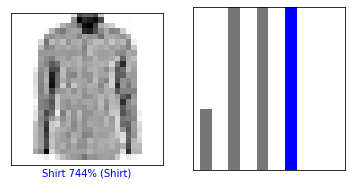

In [18]:
#Let's look at the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

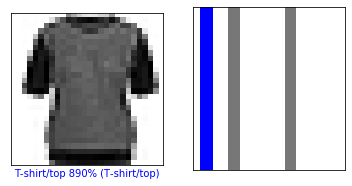

In [19]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

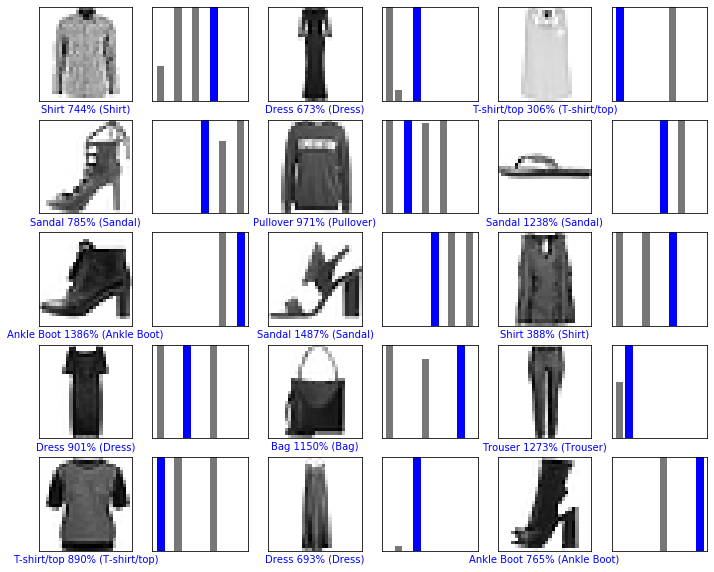

In [20]:
#Let's plot several images with their predictions.
#Plot the first X test images, their predicted label, and the true label
#Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [21]:
#Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [22]:
#Add the image to a batch where it's the only member
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [23]:
#Now predict the image
predictions_single = model.predict(img)

print(predictions_single)

[[ 0.374505  -4.7492814  3.4332666 -3.7372394  4.858944  -6.478424
   7.44415   -9.711549  -7.0835133 -4.74575  ]]


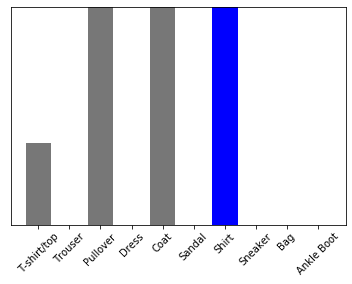

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

6